In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


Load the *Geyser* DataFrame from the Seaborn library

In [2]:
geyser = sns.load_dataset("geyser")
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


# Mean corrected data

Use the duration and waiting features

In [3]:
geyser["mc_duration"] = geyser["duration"] - geyser["duration"].mean()
geyser["mc_waiting"] = geyser["waiting"] - geyser["waiting"].mean()
geyser

,duration,waiting,kind,mc_duration,mc_waiting
0,3.600,79,long,0.112217,8.102941
1,1.800,54,short,-1.687783,-16.897059
2,3.333,74,long,-0.154783,3.102941
3,2.283,62,short,-1.204783,-8.897059
4,4.533,85,long,1.045217,14.102941
...,...,...,...,...,...
267,4.117,81,long,0.629217,10.102941
268,2.150,46,short,-1.337783,-24.897059
269,4.417,90,long,0.929217,19.102941
270,1.817,46,short,-1.670783,-24.897059


# Normalized data

Normalize the duration and waiting features

In [4]:
geyser["norm_duration"] = (geyser["duration"] - geyser["duration"].mean()) / geyser["duration"].std()
geyser["norm_waiting"] = (geyser["waiting"] - geyser["waiting"].mean()) / geyser["duration"].std()
geyser

,duration,waiting,kind,mc_duration,mc_waiting,norm_duration,norm_waiting
0,3.600,79,long,0.112217,8.102941,0.098318,7.099304
1,1.800,54,short,-1.687783,-16.897059,-1.478733,-14.804174
2,3.333,74,long,-0.154783,3.102941,-0.135612,2.718608
3,2.283,62,short,-1.204783,-8.897059,-1.055558,-7.795061
4,4.533,85,long,1.045217,14.102941,0.915755,12.356138
...,...,...,...,...,...,...,...
267,4.117,81,long,0.629217,10.102941,0.551282,8.851582
268,2.150,46,short,-1.337783,-24.897059,-1.172084,-21.813287
269,4.417,90,long,0.929217,19.102941,0.814123,16.736834
270,1.817,46,short,-1.670783,-24.897059,-1.463838,-21.813287


# Normalization

**Zero-One Unity-based Normalization** or **Min-Max Normalization** or **Standardization**

In [5]:
geyser["Z1_duration"] = (geyser["duration"] - geyser["duration"].min()) / (geyser["duration"].max() / geyser["duration"].min())
geyser["Z1_waiting"] = (geyser["waiting"] - geyser["waiting"].min()) / (geyser["waiting"].max() - geyser["waiting"].min())
geyser

,duration,waiting,kind,mc_duration,mc_waiting,norm_duration,norm_waiting,Z1_duration,Z1_waiting
0,3.600,79,long,0.112217,8.102941,0.098318,7.099304,0.627451,0.679245
1,1.800,54,short,-1.687783,-16.897059,-1.478733,-14.804174,0.062745,0.207547
2,3.333,74,long,-0.154783,3.102941,-0.135612,2.718608,0.543686,0.584906
3,2.283,62,short,-1.204783,-8.897059,-1.055558,-7.795061,0.214275,0.358491
4,4.533,85,long,1.045217,14.102941,0.915755,12.356138,0.920157,0.792453
...,...,...,...,...,...,...,...,...,...
267,4.117,81,long,0.629217,10.102941,0.551282,8.851582,0.789647,0.716981
268,2.150,46,short,-1.337783,-24.897059,-1.172084,-21.813287,0.172549,0.056604
269,4.417,90,long,0.929217,19.102941,0.814123,16.736834,0.883765,0.886792
270,1.817,46,short,-1.670783,-24.897059,-1.463838,-21.813287,0.068078,0.056604


# Plot graphs

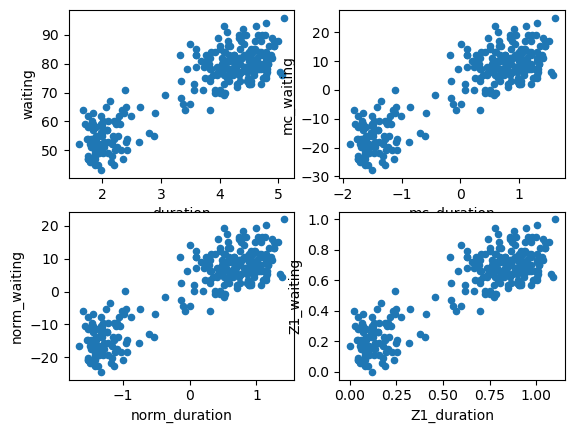

In [6]:
fig, ((orig, mc), (norm, Z1)) = plt.subplots(2, 2)
geyser.plot("duration", "waiting", kind="scatter", ax=orig)
geyser.plot("mc_duration", "mc_waiting", kind="scatter", ax=mc)
geyser.plot("norm_duration", "norm_waiting", kind="scatter", ax=norm)
geyser.plot("Z1_duration", "Z1_waiting", kind="scatter", ax=Z1)
plt.show()

# `scikit-learn` library

The `scikit-learn` library has a large number of pre-coded scalers for normalization or standardization functions, in the *preprocessing* part of the library.
`from sklearn import preprocessing`